In [18]:
from rdkit import Chem
from collections import defaultdict

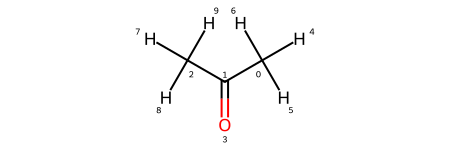

In [19]:
# Create the molecule from SMILES
mol = Chem.MolFromSmiles("CC(C)=O")

# Add hydrogen atoms
mol_h = Chem.AddHs(mol)

# Iterate over the atoms
for atom in mol_h.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()))

mol_h

In [28]:
# Initialize the atom_envs dictionary to store atoms under their environments
atom_envs = {}

# Iterate over all atoms and capture their environments
for i, atom in enumerate(mol_h.GetAtoms()):
    # Get the atom's neighbors
    atom_neighbors = []
    for neighbor in atom.GetNeighbors():
        atom_neighbors.append((neighbor.GetAtomicNum(), neighbor.GetSymbol()))

    # Include the atom's own atomic number and symbol as part of the environment
    atom_env = tuple(sorted(atom_neighbors + [(atom.GetAtomicNum(), atom.GetSymbol())]))

    # Store the atom's index under its environment
    if atom_env not in atom_envs:
        atom_envs[atom_env] = []
    atom_envs[atom_env].append(atom.GetIdx())


print(atom_envs)

unique_env_atoms = [atom_envs[atom_env][0] for atom_env in atom_envs]
print(unique_env_atoms)

{((1, 'H'), (1, 'H'), (1, 'H'), (6, 'C'), (6, 'C')): [0, 2], ((6, 'C'), (6, 'C'), (6, 'C'), (8, 'O')): [1], ((6, 'C'), (8, 'O')): [3], ((1, 'H'), (6, 'C')): [4, 5, 6, 7, 8, 9]}
[0, 1, 3, 4]
